Cluster Labels: [0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 2 0 1 0 2 1
 0 1 0 0 1 1 2 1 0 1 0 1 0 1 2 0 0 0 1 1 2 0 0 0 2 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
Medoids Indices: [ 0  5 15]


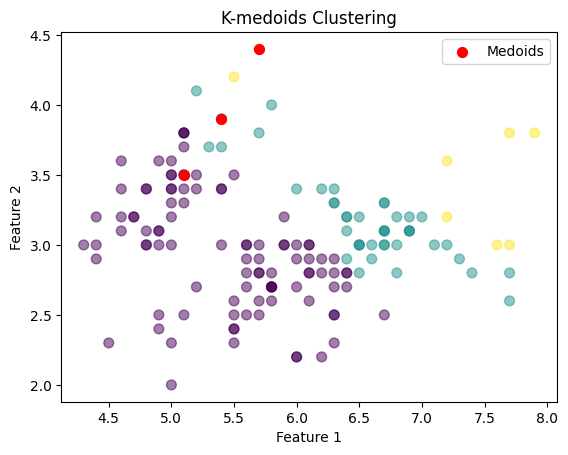

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import pairwise_distances_argmin_min

def k_medoids(X, k, max_iter=100):
    n, f = X.shape
    m = np.random.choice(n, k, replace=False)
    pm = np.copy(m)
    
    for _ in range(max_iter):
        l, d = pairwise_distances_argmin_min(X, X[m])
        
        for i in range(k):
            cp = np.where(l == i)[0]
            nm = np.argmin(np.sum(d[cp]))
            m[i] = cp[nm]
        
        if np.array_equal(pm, m):
            break
        pm = np.copy(m)
    
    return l, m

def plot_clusters(X, l, m):
    plt.scatter(X[:, 0], X[:, 1], c=l, cmap='viridis', s=50, alpha=0.5)
    plt.scatter(X[m, 0], X[m, 1], c='red', marker='.', s=200, label='Medoids')  # Use a triangle marker
    plt.title('K-medoids Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

iris = datasets.load_iris()
X = iris.data[:, :2]  
k = 3

cl, cm = k_medoids(X, k)

print("Cluster Labels:", cl)
print("Medoids Indices:", cm)

plot_clusters(X, cl, cm)
